In [1]:
from sklearn.model_selection import train_test_split

from centroid_network.CentroidNetwork import CentroidNetwork
from centroid_network.utils import *

In [2]:
def logger_config():
    logging.basicConfig(
        level=logging.INFO,
        format="%(asctime)s [%(levelname)s] %(message)s",
        handlers=[
            logging.FileHandler("output/logs.log"),
            logging.StreamHandler()
        ]
    )


def get_only_specified_classes(df: pd. DataFrame, labels: List[Any]):
    df_ret = pd.DataFrame(columns=df.columns)

    for label in labels:
        temp = df.loc[df['label'] == int(label)]
        df_ret = df_ret.append(temp)

    return df_ret

def tsne_visualization_separate_centroids(X: List[List[float]],
                                          Y: List[Any] = None):
    from sklearn.manifold import TSNE

    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)

    df = defaultdict()
    df['tsne-2d-one'] = tsne_results[:-2, 0]
    df['tsne-2d-two'] = tsne_results[:-2, 1]
    df['label'] = Y[:-2]

    df['tsne-centroids-2d-one'] = tsne_results[-2:, 0]
    df['tsne-centroids-2d-two'] = tsne_results[-2:, 1]
    df['label-centroid'] = Y[-2:]

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(16, 10))

    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="label",
        palette=sns.color_palette("hls", 2),
        data=df,
        legend="full",
        alpha=0.3
    )

    sns.scatterplot(
        x="tsne-centroids-2d-one", y="tsne-centroids-2d-two",
        hue="label-centroid",
        palette=sns.color_palette("hls", 2),
        data=df,
        legend=None,
        alpha=1.0,
        s=1000
    )

    plt.show()

def tsne_visualization(data: pd.DataFrame, labels: List[Any] = None):
    import matplotlib.pyplot as plt
    import seaborn as sns

    from sklearn.manifold import TSNE

    if isinstance(data, pd.DataFrame) and labels is None:
        X = data.iloc[:, :-1].values
        Y = data.iloc[:, -1:].values.ravel()
    else:
        X = data
        Y = labels

    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)

    print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

    df = defaultdict()
    df['tsne-2d-one'] = tsne_results[:, 0]
    df['tsne-2d-two'] = tsne_results[:, 1]
    df['label'] = Y

    plt.figure(figsize=(16, 10))

    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="label",
        palette=sns.color_palette("hls", 2),
        data=df,
        legend="full",
        alpha=0.3,
    )

# 1. Separate 2 classes from the MNIST dataset (0 and 1).

In [3]:
# read dataset
dataset = read_dataset("../datasets/mnist_70k_pca30.csv")

# normalize input
dataset = normalize_input(dataset)

# get only 2 classes
dataset = get_only_specified_classes(df = dataset, labels = ['0', '1'])

# 2. Generate tSNE visualization of this 2 classes (original dataset).

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14780 samples in 0.036s...
[t-SNE] Computed neighbors for 14780 samples in 4.787s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14780
[t-SNE] Computed conditional probabilities for sample 2000 / 14780
[t-SNE] Computed conditional probabilities for sample 3000 / 14780
[t-SNE] Computed conditional probabilities for sample 4000 / 14780
[t-SNE] Computed conditional probabilities for sample 5000 / 14780
[t-SNE] Computed conditional probabilities for sample 6000 / 14780
[t-SNE] Computed conditional probabilities for sample 7000 / 14780
[t-SNE] Computed conditional probabilities for sample 8000 / 14780
[t-SNE] Computed conditional probabilities for sample 9000 / 14780
[t-SNE] Computed conditional probabilities for sample 10000 / 14780
[t-SNE] Computed conditional probabilities for sample 11000 / 14780
[t-SNE] Computed conditional probabilities for sample 12000 / 14780
[t-SNE] Computed conditional probabilities for sa

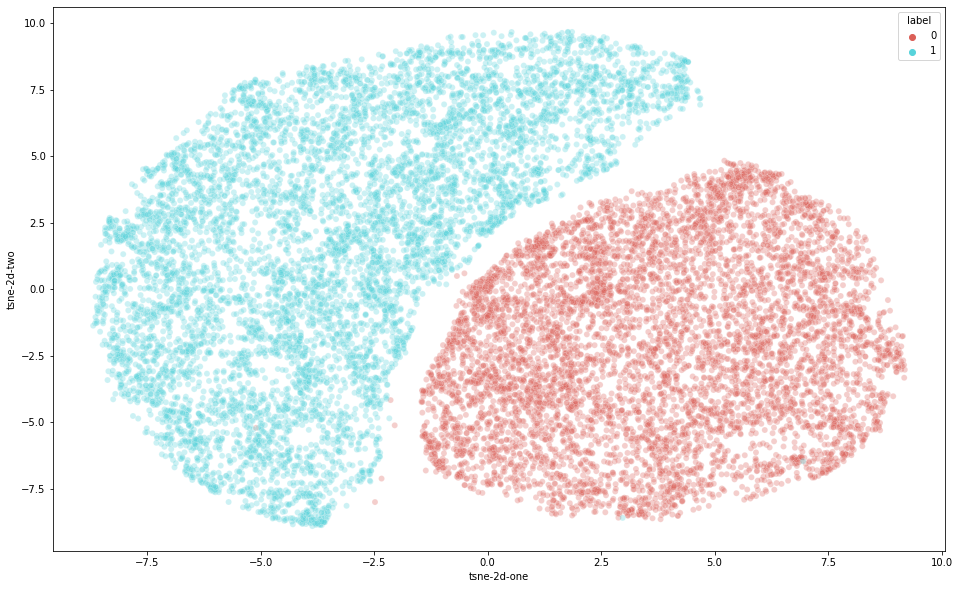

In [4]:
tsne_visualization(dataset)

# 3. Calculate score obtained by training the centroid network on this 2 classes, when we calculate M=100 centroids in each class (100-D) output.

In [5]:
# split the dataset
data, labels = separate_labels_from_dataset(dataset)

CN = CentroidNetwork()

# append layers to network
CN.append_layer(100)

# train centroid network
CN.train(data, labels)

predicted_labels, embeddings = CN.predict(data, 3)
score = evaluate(labels, predicted_labels)

print(score)

100%|██████████| 2/2 [00:16<00:00,  8.09s/it]


0.9994587280108255


# 4. Generate tSNE visualization of this 2 classes after CN for M=100.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14780 samples in 0.109s...
[t-SNE] Computed neighbors for 14780 samples in 7.732s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14780
[t-SNE] Computed conditional probabilities for sample 2000 / 14780
[t-SNE] Computed conditional probabilities for sample 3000 / 14780
[t-SNE] Computed conditional probabilities for sample 4000 / 14780
[t-SNE] Computed conditional probabilities for sample 5000 / 14780
[t-SNE] Computed conditional probabilities for sample 6000 / 14780
[t-SNE] Computed conditional probabilities for sample 7000 / 14780
[t-SNE] Computed conditional probabilities for sample 8000 / 14780
[t-SNE] Computed conditional probabilities for sample 9000 / 14780
[t-SNE] Computed conditional probabilities for sample 10000 / 14780
[t-SNE] Computed conditional probabilities for sample 11000 / 14780
[t-SNE] Computed conditional probabilities for sample 12000 / 14780
[t-SNE] Computed conditional probabilities for sa

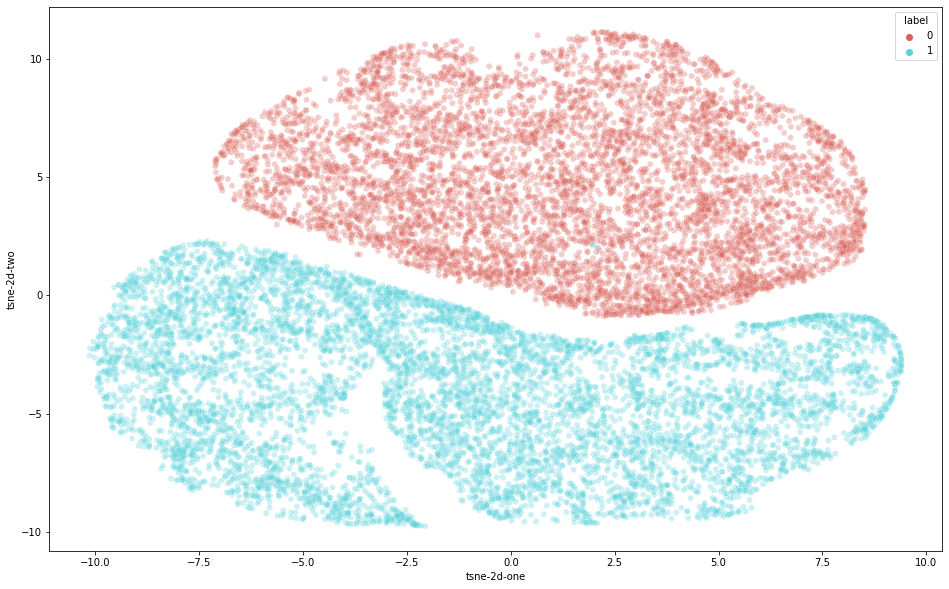

In [6]:
embeddings = [embedding.coordinates for embedding in embeddings]
tsne_visualization(data=embeddings, labels=predicted_labels.to_numpy())

# 5. Retrain the network, but use random labels instead real ones.

In [ ]:
for i in range(0,len(data)):
    labels =
    
data, labels = separate_labels_from_dataset(dataset)

CN = CentroidNetwork()

# append layers to network
CN.append_layer(100)

# train centroid network
CN.train(data, labels)

predicted_labels, embeddings = CN.predict(data, 3)
score = evaluate(labels, predicted_labels)

print(score)

# 5. Calculate one centroid for each class (we can use CN network for this purpose with M=1).

In [7]:
# split the dataset
# data, labels = separate_labels_from_dataset(dataset)
CN = CentroidNetwork()
CN.append_layer(M=1)
CN.train(data, labels)

100%|██████████| 2/2 [00:02<00:00,  1.10s/it]


In [8]:
centroids = CN.layers[0].centroids

In [9]:
X = dataset.iloc[:, :-1].values.tolist()
Y = dataset.iloc[:, -1:].values.ravel().tolist()

for label, centroids in centroids.items():
    for centroid in centroids:
        X.append(centroid.coordinates)
        Y.append(label)

# 6. Plot t-SNE embedding of original dataset with centroids.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14782 samples in 0.049s...
[t-SNE] Computed neighbors for 14782 samples in 4.923s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14782
[t-SNE] Computed conditional probabilities for sample 2000 / 14782
[t-SNE] Computed conditional probabilities for sample 3000 / 14782
[t-SNE] Computed conditional probabilities for sample 4000 / 14782
[t-SNE] Computed conditional probabilities for sample 5000 / 14782
[t-SNE] Computed conditional probabilities for sample 6000 / 14782
[t-SNE] Computed conditional probabilities for sample 7000 / 14782
[t-SNE] Computed conditional probabilities for sample 8000 / 14782
[t-SNE] Computed conditional probabilities for sample 9000 / 14782
[t-SNE] Computed conditional probabilities for sample 10000 / 14782
[t-SNE] Computed conditional probabilities for sample 11000 / 14782
[t-SNE] Computed conditional probabilities for sample 12000 / 14782
[t-SNE] Computed conditional probabilities for sa

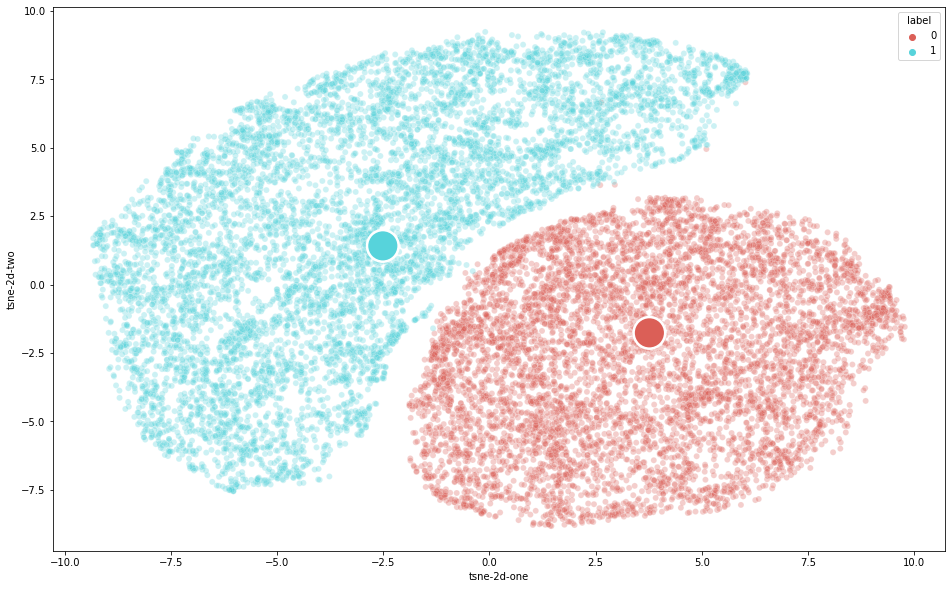

In [10]:
tsne_visualization_separate_centroids(X, Y)

# 7. Now, calculate delta, which will be used to move points.

In [11]:
centroids = CN.layers[0].centroids
centroid0 = centroids[0][0].coordinates
centroid1 = centroids[1][0].coordinates
delta = centroid1 - centroid0

# 8. Move points from one class.

In [12]:
modified_dataset = []
labels = []

temp0 = dataset.loc[dataset['label'] == 0]
temp1 = dataset.loc[dataset['label'] == 1]

labels.append(temp0['label'].to_list())
temp0 = temp0.drop(labels=['label'], axis=1).values.tolist()

labels.append(temp1['label'].to_list())
temp1 = temp1.drop(labels=['label'], axis=1).values.tolist()

centroid1 = centroid1 - delta

temp1.append(centroid1.tolist())

labels.append([list(centroids.keys())[0]])
labels.append([list(centroids.keys())[1]])

labels = [item for sublist in labels for item in sublist]

temp0 = [value for value in temp0]
temp1 = [value - delta for value in temp1]

centroid0 = centroid0.tolist()

modified_dataset.append(temp0)
modified_dataset.append(temp1)
modified_dataset = [item for sublist in modified_dataset for item in sublist]

modified_dataset.append(centroid0)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14782 samples in 0.052s...
[t-SNE] Computed neighbors for 14782 samples in 7.541s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14782
[t-SNE] Computed conditional probabilities for sample 2000 / 14782
[t-SNE] Computed conditional probabilities for sample 3000 / 14782
[t-SNE] Computed conditional probabilities for sample 4000 / 14782
[t-SNE] Computed conditional probabilities for sample 5000 / 14782
[t-SNE] Computed conditional probabilities for sample 6000 / 14782
[t-SNE] Computed conditional probabilities for sample 7000 / 14782
[t-SNE] Computed conditional probabilities for sample 8000 / 14782
[t-SNE] Computed conditional probabilities for sample 9000 / 14782
[t-SNE] Computed conditional probabilities for sample 10000 / 14782
[t-SNE] Computed conditional probabilities for sample 11000 / 14782
[t-SNE] Computed conditional probabilities for sample 12000 / 14782
[t-SNE] Computed conditional probabilities for sa

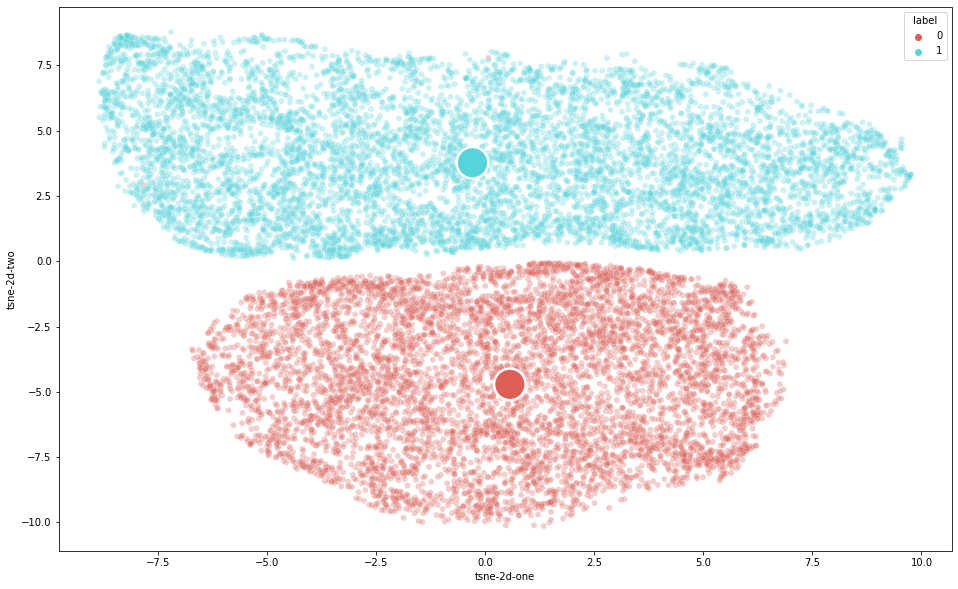

In [13]:
tsne_visualization_separate_centroids(modified_dataset, labels)